In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

In [2]:
MODEL_LOC = "/home/ubuntu/coq-modeling/models/premise_selection_basic"

In [3]:
metrics_loc = os.path.join(MODEL_LOC, "lightning_logs", "version_0", "metrics.csv")
metrics_df = pd.read_csv(metrics_loc)

In [9]:
metrics_df[~pd.isna(metrics_df["eval_loss"])]

,lr-Adam,step,loss,epoch,eval_loss
736,NaN,18428,NaN,0.0,0.014956
1475,NaN,36857,NaN,1.0,0.014126
2212,NaN,55286,NaN,2.0,0.013507
2951,NaN,73715,NaN,3.0,0.014993
3688,NaN,92144,NaN,4.0,0.019724
4427,NaN,110573,NaN,5.0,0.013847
5166,NaN,129002,NaN,6.0,0.017421
5903,NaN,147431,NaN,7.0,0.025201
6642,NaN,165860,NaN,8.0,0.020801


In [4]:
train_points = metrics_df.loc[~pd.isna(metrics_df["loss"]) &
                              ~pd.isna(metrics_df["step"])]
train_steps = train_points["step"].values
train_losses = train_points["loss"].values

if "eval_loss" in metrics_df.columns:
    eval_points = metrics_df.loc[~pd.isna(metrics_df["eval_loss"]) &
                                ~pd.isna(metrics_df["step"])]
    eval_steps = eval_points["step"].values
    eval_losses = eval_points["eval_loss"].values
else:
    eval_steps = []
    eval_losses = []


In [5]:
train_losses[-3]

0.0170470681041479

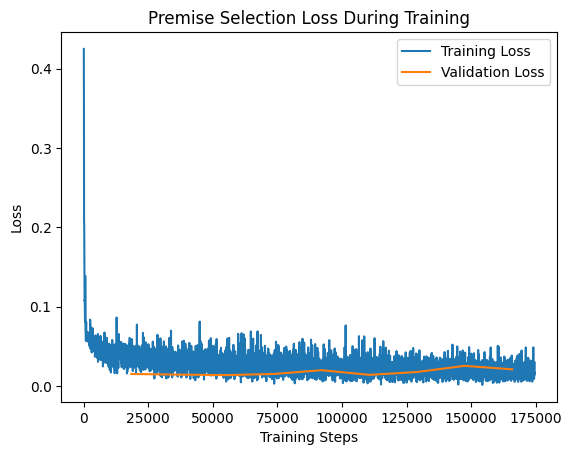

In [6]:
fig, ax = plt.subplots()
ax.plot(train_steps, train_losses, label="Training Loss")
ax.plot(eval_steps, eval_losses, label="Validation Loss")
ax.set_xlabel("Training Steps")
ax.set_ylabel("Loss")
ax.set_title("Premise Selection Loss During Training")
ax.legend()

